# Model Training 


### 

1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# modelling 

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from catboost import CatBoostRegressor 
import warnings


In [8]:
!pip install catboost 

  Using cached catboost-1.2.8-cp313-cp313-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.1.1-py3-none-any.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 236.4 kB/s eta 0:00:0000:0200:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 281.3 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [catboost]3/4 [catboost]


In [7]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 506.4 kB/s eta 0:00:00a 0:00:01


##### Reading the CSV file 

In [3]:
df = pd.read_csv('/Users/venkatshreenidhir/Desktop/Project Development /notebook/data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Preparing X and Y variables 

In [5]:
X= df.drop(columns=['math score'],axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y= df['math score']

In [8]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [9]:
## Create column transformer witg 3 types of transformer 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer,num_features)
    ]
)

In [10]:
X= preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

In [12]:
# Train,Test,SPlit

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model training 

In [13]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

In [18]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Catboost": CatBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    #make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset 
    model_train_mae, model_train_rsme, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rsme, model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("Root mean square error: {:.4f}".format(model_train_rsme))
    print("Mean Absolute Error: {:.4f}".format(model_train_mae))
    print(" R2 Score: {:.4f}".format(model_train_r2))

    print('-------------------------------------------')
    print('Model performance for Test set')
    print("Root mean square error: {:.4f}".format(model_test_rsme))
    print("Mean Absolute Error: {:.4f}".format(model_test_mae))
    print(" R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')




LinearRegression
Model performance for Training set
Root mean square error: 5.3231
Mean Absolute Error: 4.2667
 R2 Score: 0.8743
-------------------------------------------
Model performance for Test set
Root mean square error: 5.3940
Mean Absolute Error: 4.2148
 R2 Score: 0.8804


Lasso
Model performance for Training set
Root mean square error: 6.5938
Mean Absolute Error: 5.2063
 R2 Score: 0.8071
-------------------------------------------
Model performance for Test set
Root mean square error: 6.5197
Mean Absolute Error: 5.1579
 R2 Score: 0.8253


Ridge
Model performance for Training set
Root mean square error: 5.3233
Mean Absolute Error: 4.2650
 R2 Score: 0.8743
-------------------------------------------
Model performance for Test set
Root mean square error: 5.3904
Mean Absolute Error: 4.2111
 R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
Root mean square error: 5.7172
Mean Absolute Error: 4.5270
 R2 Score: 0.8550
---------------------------------------

In [15]:
r2_list

[0.8804332983749564,
 0.8253197323627853,
 0.880593148502874,
 0.7836806685669011,
 0.7478614143924674,
 0.8519594807181183,
 0.8516318920747058]

Results 


In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Names', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Names,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
5,Random Forest Regressor,0.851959
6,Catboost,0.851632
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783681
4,Decision Tree,0.747861


# Linear Regression

In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


# Plot y_pred and y_test

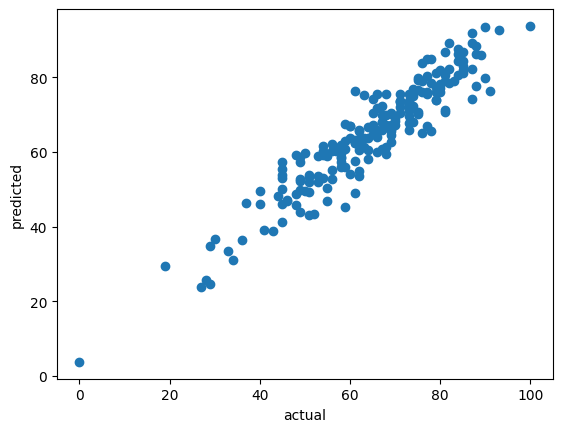

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

<Axes: xlabel='math score'>

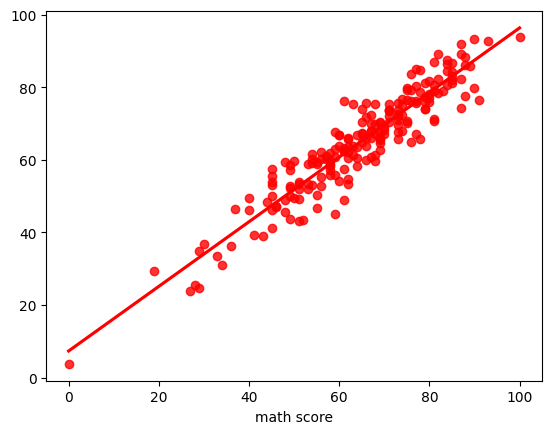

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

## Difference Between Actual And Predicted Values 

In [25]:
pred_df = pd.DataFrame({'Actual_Value':y_test,'Predicted_value': y_pred,'Difference': y_test-y_pred})

In [28]:
pred_df

#521 is row no)

,Actual_Value,Predicted_value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
